In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm
from scipy.io import wavfile 
%matplotlib inline

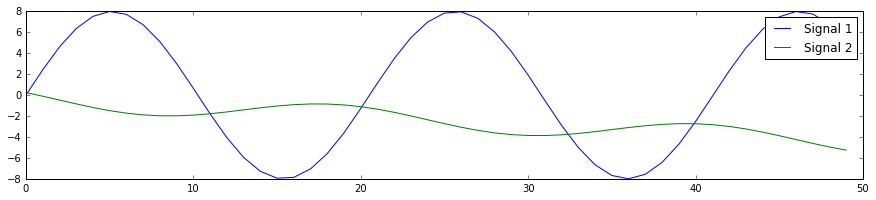

In [15]:
sig1 = 8*np.sin(np.linspace(0,3,num=50)*5)
sig2 = map( lambda x: np.cos(x) - 0.3*x, (np.linspace(1,15,num=50)))

plt.figure(figsize=(15,3))
plt.plot(sig1, label='Signal 1')
plt.plot(sig2, label='Signal 2')
plt.legend()
plt.show()

In [16]:
X = np.array([sig1,sig2])
A = np.array([[1,3],[5,3]])
X2 = A.dot(X)

In [17]:
def pre_whiten(Z):
    Z_c = Z - np.mean(Z)
    Cov = np.cov(Z_c)
    
    vals, E = np.linalg.eig(Cov)
    D = np.diag(vals)

    return E.dot( sqrtm(np.linalg.inv( D )) ).dot( E.T ).dot(Z_c)

In [20]:
X_whitened = pre_whiten(X2)

In [21]:
print np.cov(X_whitened) 
#should be an Identity matrix

[[  1.00000000e+00  -5.57868237e-16]
 [ -5.57868237e-16   1.00000000e+00]]


In [22]:
f = lambda x: np.log(np.cosh(x))
g = lambda x: np.tanh(x)
dg = lambda x: 1 - np.tanh(x)**2


def findvec(Z):
    w_next = np.random.rand(Z.shape[0],1)
    for i in xrange(20000):
        w_prev = w_next.copy()
        w_plus = Z.dot( g(w_prev.T.dot(Z)).T ) - np.mean(dg(w_prev.T.dot(Z)),1)*w_prev
        w_next = w_plus/np.linalg.norm(w_plus)
        if np.linalg.norm(w_prev-w_next) < 1e-7:
            break
    return w_next

In [23]:
w = findvec(X_whitened)

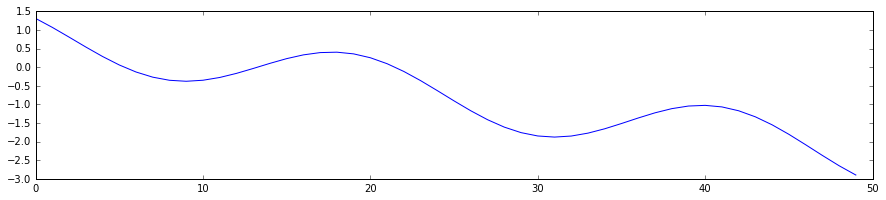

In [24]:
plt.figure(figsize=(15,3))
plt.plot(w.T.dot(X_whitened).ravel())
some_other = w.T.dot(X_whitened).ravel()

#### Playing around with sound 
(not successful)

In [30]:
import IPython.display as disp

fs1, data1 = wavfile.read('../datasets/one.wav','r')
fs2, data2 = wavfile.read('../datasets/two.wav','r')

In [57]:
short1 = data1[5000:25000]
short2 = data2[5000:25000]

In [59]:
disp.Audio(short1,rate=8000)

In [60]:
disp.Audio(short2,rate=8000)

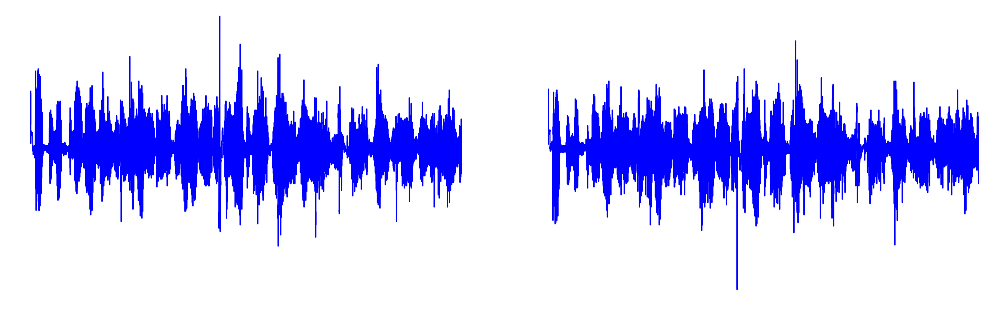

In [32]:
plt.figure(figsize=(17,5))
plt.subplot(121)
plt.axis('off')
plt.plot(data2)
plt.subplot(122)
plt.axis('off')
plt.plot(data1)

In [67]:
X = np.array([short1,short2])
X = X - np.mean(X, axis=1).reshape((2,1))
covariance = np.dot(X,X.T)
eig_stuff = np.linalg.eig(covariance)
cov_eigvals,cov_eigvecs = eig_stuff[0].astype('d'),eig_stuff[1]
E = cov_eigvecs
D = np.diag(cov_eigvals)
X = E.dot(sqrtm(np.linalg.inv(D))).dot(E.T).dot(X)

In [68]:
def g(u):
    return u*np.exp(-u**2/2.0)
def dg(u):
    return (1-u**2)*np.exp(-u**2/2.0)

m = X.shape[1]
W = []

#for p in range(2):
w = np.random.randn(2)
w_prev = np.zeros(2)
for _ in range(50000):
    w=w.reshape(2,1)
    w_prev = w
    
    w = X.dot(g(np.dot(w.T,X)).T)/float(m) - (dg(np.dot(w.T,X)).dot(np.ones((m,1)))[0][0]*(w))/float(m)
    w = w/np.linalg.norm(w)
W.append(w.flatten())

v = np.random.randn(2)
v_prev = np.zeros(2)
for _ in range(50000):
    v=v.reshape(2,1)
    v_prev = v
    
    v = X.dot(g(np.dot(v.T,X)).T)/float(m) - (dg(np.dot(v.T,X)).dot(np.ones((m,1)))[0][0]*(v))/float(m)
    v = v - v.T.dot(w)*(w)
    v = v/np.linalg.norm(v)
W.append(v.flatten())
    
W = np.array(W)

In [69]:
rec_sig1 = np.dot(w.T,X)[0]
rec_sig2 = np.dot(v.T,X)[0]

TODO: fix this one 

In [70]:
disp.Audio(rec_sig1,rate=8000)

In [71]:
disp.Audio(rec_sig2,rate=8000)